<h1>Практична робота №4 <h1>
<h2>Пруніч Сергій МІТ-31<h2>

In [12]:
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from sklearn.metrics import classification_report

import warnings
warnings.filterwarnings("ignore")

   Feature1  Feature2  Target
0 -0.872929  0.013042       1
1  1.312935  2.770534       1
2  2.340428  2.420996       1
3  2.294548 -0.404380       1
4  0.944105  0.477241       1
Найкращі гіперпараметри: {'max_iter': 100, 'penalty': 'l2'}
Accuracy: 0.875
Precision: 0.7727272727272727
Recall: 1.0
F1 Score: 0.8717948717948718
AUC-ROC Score: 0.891304347826087


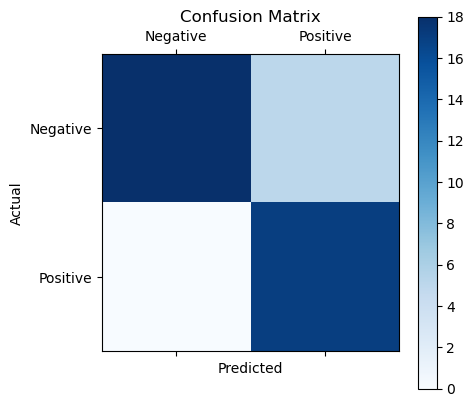

In [13]:
# Завдання для бінарної класифікації

# Завантаження даних
data = pd.read_csv('classification_dataset.csv')

# Виведення перших рядків даних для перевірки
print(data.head())

# Розділення на ознаки та цільову змінну
X = data.drop('Target', axis=1)
y = data['Target']

# Розділення даних на навчальний та тестовий набори
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

param_grid = {
    'max_iter': [100, 200, 300, 400],
    'penalty': ['l1', 'l2'],
}

grid_search = GridSearchCV(estimator=LogisticRegression(random_state=42), param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

classifier = grid_search.best_estimator_
y_pred = classifier.predict(X_test)


# Виведення найкращих гіперпараметрів та результатів
best_params = grid_search.best_params_
print("Найкращі гіперпараметри:", best_params)

# Ініціалізація та навчання класифікатора (логістична регресія у цьому випадку)
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

# Прогнозування на тестовому наборі
y_pred = classifier.predict(X_test)

# Оцінка ефективності класифікатора
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("AUC-ROC Score:", roc_auc_score(y_test, y_pred))

# Візуалізація матриці плутанини
plt.matshow(confusion_matrix(y_test, y_pred), cmap=plt.cm.Blues)
plt.colorbar()
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.xticks([0, 1], ['Negative', 'Positive'])
plt.yticks([0, 1], ['Negative', 'Positive'])
plt.show()


In [14]:
# Завдання для мультикласової класифікаціїї

# Завантаження даних
data = pd.read_csv('multiclass_dataset.csv')

# Розділення на ознаки та цільову змінну
X = data.drop('Target', axis=1)
y = data['Target']

# Розділення даних на навчальний та тестовий набори
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Ініціалізація та навчання класифікатора (Random Forest у цьому випадку)
model_log = LogisticRegression(C=1.0, penalty='l2', max_iter=1000, random_state=42)
model_Svc = SVC(C=1.0, kernel='linear', random_state=42)
model_tree = DecisionTreeClassifier(max_depth=None, random_state=42)

model_log.fit(X_train, y_train)
model_Svc.fit(X_train, y_train)
model_tree.fit(X_train, y_train)

# Оцінка ефективності класифікатора
def model_metrics(classifier,X_test, y_test):
    y_pred = classifier.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    conf_matrix = confusion_matrix(y_test, y_pred)
    
    print(f'{type(classifier).__name__}:')
    print(f'precision: {accuracy}')
    print(f'recall: {recall}')
    print(f'F1: {f1}')
    print('Матриця:')
    print(conf_matrix)

# Вивід результатів
model_metrics(model_log, X_test, y_test)
model_metrics(model_Svc, X_test, y_test)
model_metrics(model_tree, X_test, y_test)

LogisticRegression:
precision: 0.65
recall: 0.65
F1: 0.6395368492224476
Матриця:
[[ 4  0  3  0]
 [ 5  2  0  1]
 [ 1  1 11  1]
 [ 0  1  1  9]]
SVC:
precision: 0.7
recall: 0.7
F1: 0.6821635472370766
Матриця:
[[ 4  0  3  0]
 [ 5  2  0  1]
 [ 1  1 11  1]
 [ 0  0  0 11]]
DecisionTreeClassifier:
precision: 0.65
recall: 0.65
F1: 0.6496303467699349
Матриця:
[[5 1 1 0]
 [4 3 0 1]
 [3 0 9 2]
 [0 0 2 9]]


In [15]:
# Завдання для мультилейб класифікації

data = pd.read_csv('multilabel_dataset.csv')

X = data[['Feature1', 'Feature2', 'Feature3']]
y = data[['Label1', 'Label2', 'Label3', 'Label4']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

param_grid = {
    'estimator__n_estimators': [100, 200, 300],  # Кількість дерев 
    'estimator__max_depth': [3, 4, 5],  # Глибина дерев
    'estimator__learning_rate': [0.01, 0.1, 0.2]  # Швидкість навчання
}

clf = MultiOutputClassifier(XGBClassifier())
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=3)
grid_search.fit(X_train, y_train)

best_estimator = grid_search.best_estimator_
best_params = grid_search.best_params_
print("Найкращі гіперпараметри:", best_params)
y_pred = best_estimator.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'\nAccuracy on test data: {accuracy}')

report = classification_report(y_test, y_pred)
print(f'Classification Report:\n{report}')

Найкращі гіперпараметри: {'estimator__learning_rate': 0.1, 'estimator__max_depth': 3, 'estimator__n_estimators': 300}

Accuracy on test data: 0.4
Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.50      0.57         8
           1       0.74      0.70      0.72        20
           2       0.85      0.81      0.83        21
           3       0.68      0.59      0.63        22

   micro avg       0.75      0.68      0.71        71
   macro avg       0.73      0.65      0.69        71
weighted avg       0.75      0.68      0.71        71
 samples avg       0.72      0.62      0.64        71

